# MATRIX

<div>
<img src="images/02_Matrix/01_Matrix_.jpg" width="500"/>
</div>

In [1]:
import numpy as np
from matplotlib import pyplot as plt

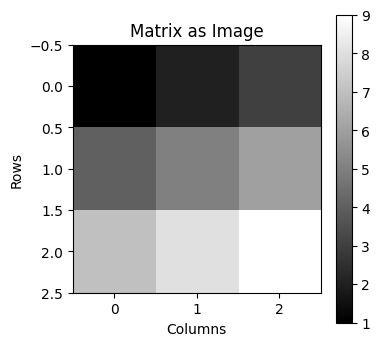

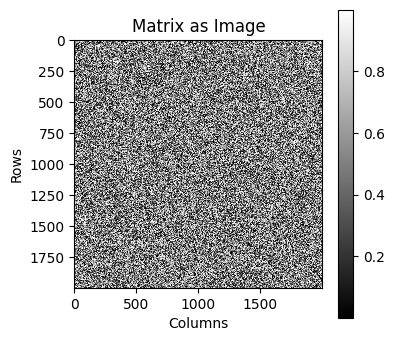

In [2]:
def show_matrix_as_image(matrix, title='Matrix as Image'):
    fig, ax = plt.subplots(figsize=(4,4))
    plt.imshow(matrix, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.title(title)
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()

# Example matrix
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

# Display the matrix as an image
show_matrix_as_image(matrix)

# create an example of a large matrix filled with random numbers
matrix = np.random.rand(2000, 2000)

# Display the matrix as an image
show_matrix_as_image(matrix)

## Special matrices are the identity matrix (equivalent of a scalar 1) and the zero matrix

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


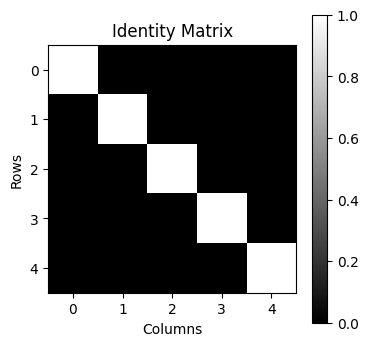

In [3]:
identity = np.eye(5)
zero = np.zeros([5,5])
print(identity)
print(zero)

show_matrix_as_image(identity, 'Identity Matrix')

## Matrix Math: addition, scalar multiplication, Hadamard multiplication

<div>
<img src="images/02_Matrix/matrix_math.jpg" width="500"/>
</div>



In [4]:
M1 = np.array([[2,3,4],[1,2,4]]) 
M2 = np.array([[0,3,1],[-1,-4,2]])

# adding two matrices 
print(M1 + M2)

# adding a scalar is possible in Python thanks to broadcasting, but it's not a formal linear algebra operation
M1 = np.array([[4,5,1], [0,1,11], [4,9,7]])

ʎ = 6
print(ʎ+M1)

# there is instead a linear-algebra way to add a scalar to a square matrix, that is called "shifting", which is adding a scalar to an identity matrix, then add it.$
# in this case, only the diagonal element change. It's an important operation used to fit a model to data in ML
id = np.eye(len(M1))
print(M1 + (id*6))

# element-wise (Hadamard) multiplication
M1 = np.array([[2,3,4],[1,2,4]]) 
M2 = np.array([[0,3,1],[-1,-4,2]])
print(M1*M2)

[[ 2  6  5]
 [ 0 -2  6]]
[[10 11  7]
 [ 6  7 17]
 [10 15 13]]
[[10.  5.  1.]
 [ 0.  7. 11.]
 [ 4.  9. 13.]]
[[ 0  9  4]
 [-1 -8  8]]


## Standard Matrix Multiplication

<div>
<img src="images/02_Matrix/matrix_mult_1.jpg" width="500"/>
</div>


<div>
<img src="images/02_Matrix/matrix_mult_2.jpg" width="500"/>
</div>



[[ 47  54  61  68]
 [ 83  98 113 128]]
[19.5 10.5]
[ 6 -4]


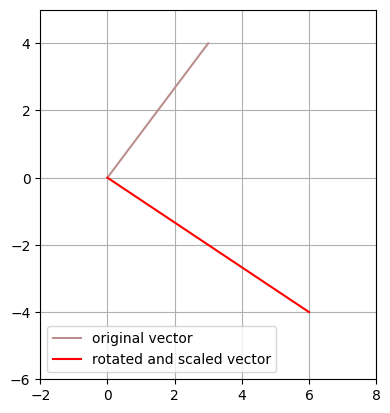

In [5]:
M1 = np.array([[1,2,4], [4,5,6]])
M2 = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])

standard_mult = M1@M2
print(standard_mult)

# Linear Weighted Combination can be done with a vector-matrix multiplication

M = np.array([[2,3], [2,1]])
x = np.array([3,4.5])

print(M@x)

# When we think of a vector as a geometric line, then matrix-vector multiplication becomes a way of rotating and scaling the vector
v = np.array([3,4])
M = np.array([[2,0],[0,-1]])

transformed_v = v@M
print(transformed_v)

fig, ax = plt.subplots()
plt.xlim(-2,8)
plt.ylim(-6,5)
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.grid()

plt.plot([0,v[0]],[0, v[1]],color='rosybrown', label='original vector')
plt.plot([0,transformed_v[0]],[0, transformed_v[1]],color='red', label='rotated and scaled vector')


plt.legend()
plt.show()

## Transpose and LIVE EVIL

In [6]:
# transpose a matrix with Python can be done in different ways:
M = np.array([[2,3,4], [6,7,8]])
print(M.T)
print(M.transpose())

# to remember the order of evaluation of transposed matrices, we can use the mnemonic phrase LIVE EVIL
L = np.array([[2,3], [4,5]])
I = np.array([[4,5],[7,9]])
V = np.array([[9,8],[10,22]])
E = np.array([[5,6], [9,6]])

print((L@I@V@E).T)
print(E.T @ V.T @ I.T @ L.T)

[[2 6]
 [3 7]
 [4 8]]
[[2 6]
 [3 7]
 [4 8]]
[[12569 22087]
 [10062 17682]]
[[12569 22087]
 [10062 17682]]


## Symmetric Matrices

For a matrix to be symmetric, the corresponding rows and column have to be equal.\
That means that when you swap the rows and columns, nothing happens to the matrix.\

A symmetric matrix equals its transpose

Multiplying <b>any</b> matrix by its transpose will produce a square symmetric matrix

In [7]:
M = np.array([[1,2,3,5,6,9,100], [4,5,6,6,78,99,0], [3,56,123,766,87,32,2]])
Sym = M@M.T
Sym_2 = M.T@M

print(Sym)
print(Sym.T)

print('----------')
print(Sym_2)
print(Sym_2.T)

[[ 10156   1421   5324]
 [  1421  15998  15580]
 [  5324  15580 613627]]
[[ 10156   1421   5324]
 [  1421  15998  15580]
 [  5324  15580 613627]]
----------
[[    26    190    396   2327    579    501    106]
 [   190   3165   6924  42936   5274   2305    312]
 [   396   6924  15174  94269  11187   4557    546]
 [  2327  42936  94269 586817  67140  25151   2032]
 [   579   5274  11187  67140  13689  10560    774]
 [   501   2305   4557  25151  10560  10906    964]
 [   106    312    546   2032    774    964  10004]]
[[    26    190    396   2327    579    501    106]
 [   190   3165   6924  42936   5274   2305    312]
 [   396   6924  15174  94269  11187   4557    546]
 [  2327  42936  94269 586817  67140  25151   2032]
 [   579   5274  11187  67140  13689  10560    774]
 [   501   2305   4557  25151  10560  10906    964]
 [   106    312    546   2032    774    964  10004]]
